In [2421]:
import tensorflow as tf
from tensorflow import keras

# Commonly used modules
import numpy as np
import os
import sys
import random

# Images, plots, display, and visualization
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cv2
import IPython
from six.moves import urllib

print(tf.__version__)
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.model_selection import train_test_split

from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_squared_log_error, r2_score

2.8.2


In [2422]:
url = "https://raw.githubusercontent.com/Dartis4/steam-deck-calculator/main/public/8-26-2022.csv"

In [2423]:
data = pd.read_csv(url)
data

,Timestamp,Region,Model,rtReserveTime or preorder-email time,Initial Valve Estimate,Your most recent pre-order estimated time,When did you receive your ready to order email?
0,2/25/2022 13:21:40,US,256,1626454969,December,Q1,1.645813e+09
1,8/1/2022 16:24:07,UK,512,1635594996,After Q2,Q3,NaN
2,2/9/2022 14:54:02,US,512,1626454856,December,Q1,NaN
3,4/23/2022 3:26:08,US,256,1626460344,Q1,Q2,NaN
4,2/9/2022 15:04:49,EU,256,1626478685,Q1,Q2,NaN
...,...,...,...,...,...,...,...
21784,8/26/2022 16:02:42,UK,64,1633871940,After Q2,Q3,1.660840e+09
21785,8/26/2022 16:24:12,US,512,1634856734,After Q2,Q3,1.661449e+09
21786,8/26/2022 16:31:40,US,64,1646642858,After Q2,Q3,NaN
21787,8/26/2022 17:32:36,US,512,1633362300,Q2,After Q4,1.661193e+09


In [2424]:
data.columns = ["timestamp", "region", "model", "rt_reservetime", "init_est", "rec_est", "ready"]
data

,timestamp,region,model,rt_reservetime,init_est,rec_est,ready
0,2/25/2022 13:21:40,US,256,1626454969,December,Q1,1.645813e+09
1,8/1/2022 16:24:07,UK,512,1635594996,After Q2,Q3,NaN
2,2/9/2022 14:54:02,US,512,1626454856,December,Q1,NaN
3,4/23/2022 3:26:08,US,256,1626460344,Q1,Q2,NaN
4,2/9/2022 15:04:49,EU,256,1626478685,Q1,Q2,NaN
...,...,...,...,...,...,...,...
21784,8/26/2022 16:02:42,UK,64,1633871940,After Q2,Q3,1.660840e+09
21785,8/26/2022 16:24:12,US,512,1634856734,After Q2,Q3,1.661449e+09
21786,8/26/2022 16:31:40,US,64,1646642858,After Q2,Q3,NaN
21787,8/26/2022 17:32:36,US,512,1633362300,Q2,After Q4,1.661193e+09


In [2425]:
reg = pd.get_dummies(data.region)
mod = pd.get_dummies(data.model)

In [2426]:
reg

,EU,UK,US
0,0,0,1
1,0,1,0
2,0,0,1
3,0,0,1
4,1,0,0
...,...,...,...
21784,0,1,0
21785,0,0,1
21786,0,0,1
21787,0,0,1


In [2427]:
mod

,64,256,512
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
21784,1,0,0
21785,0,0,1
21786,1,0,0
21787,0,0,1


In [2428]:
data.drop(columns=['region', 'model', 'timestamp'], inplace=True)

In [2429]:
data = data.join(reg)
data = data.join(mod)
data

,rt_reservetime,init_est,rec_est,ready,EU,UK,US,64,256,512
0,1626454969,December,Q1,1.645813e+09,0,0,1,0,1,0
1,1635594996,After Q2,Q3,NaN,0,1,0,0,0,1
2,1626454856,December,Q1,NaN,0,0,1,0,0,1
3,1626460344,Q1,Q2,NaN,0,0,1,0,1,0
4,1626478685,Q1,Q2,NaN,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
21784,1633871940,After Q2,Q3,1.660840e+09,0,1,0,1,0,0
21785,1634856734,After Q2,Q3,1.661449e+09,0,0,1,0,0,1
21786,1646642858,After Q2,Q3,NaN,0,0,1,1,0,0
21787,1633362300,Q2,After Q4,1.661193e+09,0,0,1,0,0,1


In [2430]:
# print(pd.unique(data.rec_est))

In [2431]:
init_pools = ['December', 'After Q2', 'Q2', 'Q1']
latest_pools = ['After Q3', 'Q3', 'After Q2', 'Q2', 'Q1']

init_rankings, _ = pd.factorize(pd.Categorical(data.init_est, categories=init_pools), sort=True)
rec_rankings, _ = pd.factorize(pd.Categorical(data.rec_est, categories=latest_pools), sort=True)
# data
data.init_est = init_rankings
data.rec_est = rec_rankings
data

,rt_reservetime,init_est,rec_est,ready,EU,UK,US,64,256,512
0,1626454969,0,4,1.645813e+09,0,0,1,0,1,0
1,1635594996,1,1,NaN,0,1,0,0,0,1
2,1626454856,0,4,NaN,0,0,1,0,0,1
3,1626460344,3,3,NaN,0,0,1,0,1,0
4,1626478685,3,3,NaN,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
21784,1633871940,1,1,1.660840e+09,0,1,0,1,0,0
21785,1634856734,1,1,1.661449e+09,0,0,1,0,0,1
21786,1646642858,1,1,NaN,0,0,1,1,0,0
21787,1633362300,2,-1,1.661193e+09,0,0,1,0,0,1


In [2432]:
t = data['rt_reservetime']
times = t.where(t > 1700000000)
time = times.dropna()
index, value = time.index.values, time.values
# print(index, value)
data['rt_reservetime'].loc[index] = value / 1000

# times = t.where(t < 1600000000)
# time = times.dropna()
# index, value = time.index.values, time.values
# # print(index, value)
# data['rt_reservetime'].loc[index] = value * 1000

data

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,rt_reservetime,init_est,rec_est,ready,EU,UK,US,64,256,512
0,1.626455e+09,0,4,1.645813e+09,0,0,1,0,1,0
1,1.635595e+09,1,1,NaN,0,1,0,0,0,1
2,1.626455e+09,0,4,NaN,0,0,1,0,0,1
3,1.626460e+09,3,3,NaN,0,0,1,0,1,0
4,1.626479e+09,3,3,NaN,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
21784,1.633872e+09,1,1,1.660840e+09,0,1,0,1,0,0
21785,1.634857e+09,1,1,1.661449e+09,0,0,1,0,0,1
21786,1.646643e+09,1,1,NaN,0,0,1,1,0,0
21787,1.633362e+09,2,-1,1.661193e+09,0,0,1,0,0,1


In [2433]:
ind = data.ready.notna()
good_data = data.iloc[ind.values]

len(good_data)

6613

In [2434]:
other_ind = data.ready.isna()
no_answer = data.iloc[other_ind.values]

len(no_answer)

15176

In [2435]:
good_data

,rt_reservetime,init_est,rec_est,ready,EU,UK,US,64,256,512
0,1.626455e+09,0,4,1.645813e+09,0,0,1,0,1,0
6,1.626455e+09,0,4,1.645813e+09,1,0,0,0,0,1
8,1.629282e+09,3,3,1.653928e+09,1,0,0,0,1,0
11,1.626456e+09,3,3,1.650302e+09,0,0,1,0,0,1
30,1.626469e+09,3,3,1.650300e+09,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
21781,1.640535e+09,1,1,1.661447e+09,1,0,0,0,1,0
21783,1.634498e+09,1,1,1.661023e+09,1,0,0,0,0,1
21784,1.633872e+09,1,1,1.660840e+09,0,1,0,1,0,0
21785,1.634857e+09,1,1,1.661449e+09,0,0,1,0,0,1


In [2436]:
good_data.reset_index(inplace=True)
good_data.drop(columns=['index'], inplace=True)

good_data

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,rt_reservetime,init_est,rec_est,ready,EU,UK,US,64,256,512
0,1.626455e+09,0,4,1.645813e+09,0,0,1,0,1,0
1,1.626455e+09,0,4,1.645813e+09,1,0,0,0,0,1
2,1.629282e+09,3,3,1.653928e+09,1,0,0,0,1,0
3,1.626456e+09,3,3,1.650302e+09,0,0,1,0,0,1
4,1.626469e+09,3,3,1.650300e+09,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
6608,1.640535e+09,1,1,1.661447e+09,1,0,0,0,1,0
6609,1.634498e+09,1,1,1.661023e+09,1,0,0,0,0,1
6610,1.633872e+09,1,1,1.660840e+09,0,1,0,1,0,0
6611,1.634857e+09,1,1,1.661449e+09,0,0,1,0,0,1


In [2437]:
t2 = good_data['ready']
times2 = t2.where(t2 > 1700000000)
time2 = times2.dropna()

print(time2)
print(list(time2))
time2.loc[18] = 1627009860000
time2.loc[1057] = time2.loc[1057] * 100
time2.loc[1112] = 1626459540000
time2.loc[1618] = time2.loc[1618] * 100
time2.loc[2905] = 1626812340000
time2.loc[6055] = 1619460600000
good_data.drop(index=[2325,3133,3657,5474], inplace=True)

indices, values = time2.index.values, time2.values

for i, v in zip(indices, values):
  # print(i, v)
  val = v / 1000
  if val > 1600000000 and val < 1700000000:
    print(val)
    good_data['ready'].loc[i] = val



good_data

18      2.207202e+11
42      1.626488e+12
56      1.626417e+12
92      1.626455e+12
1057    1.626446e+10
1112    7.162021e+09
1618    1.626462e+10
2325    1.111111e+10
2905    2.007211e+09
3133    7.353333e+09
3657    6.788755e+09
5474    1.745108e+09
5758    1.914266e+09
6055    2.642022e+09
Name: ready, dtype: float64
[220720212011.0, 1626488411000.0, 1626416671000.0, 1626454800000.0, 16264461150.0, 7162021119.0, 16264619870.0, 11111111111.0, 2007211319.0, 7353333333.0, 6788754796.0, 1745108214.0, 1914265602.0, 2642022111.0]
1627009860.0
1626488411.0
1626416671.0
1626454800.0
1626446115.0
1626459540.0
1626461987.0
1626812340.0
1619460600.0


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,rt_reservetime,init_est,rec_est,ready,EU,UK,US,64,256,512
0,1.626455e+09,0,4,1.645813e+09,0,0,1,0,1,0
1,1.626455e+09,0,4,1.645813e+09,1,0,0,0,0,1
2,1.629282e+09,3,3,1.653928e+09,1,0,0,0,1,0
3,1.626456e+09,3,3,1.650302e+09,0,0,1,0,0,1
4,1.626469e+09,3,3,1.650300e+09,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
6608,1.640535e+09,1,1,1.661447e+09,1,0,0,0,1,0
6609,1.634498e+09,1,1,1.661023e+09,1,0,0,0,0,1
6610,1.633872e+09,1,1,1.660840e+09,0,1,0,1,0,0
6611,1.634857e+09,1,1,1.661449e+09,0,0,1,0,0,1


In [2438]:
# good_data['rt_reservetime'] = pd.to_datetime(good_data['rt_reservetime'], unit='s')
# good_data['ready'] = pd.to_datetime(good_data['ready'], unit='s')
# good_data

In [2439]:
X = good_data.drop(columns=['ready'])
y = good_data.ready

X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.2, random_state=42)

In [2440]:
model = XGBRegressor(objective='reg:squarederror')
model.fit(X_train, y_train)

XGBRegressor(objective='reg:squarederror')

In [2441]:
predictions = model.predict(X_test)
list(pd.to_datetime(predictions, unit='s'))

[Timestamp('2022-07-23 13:09:20'),
 Timestamp('2022-07-15 03:14:08'),
 Timestamp('2022-05-30 16:34:08'),
 Timestamp('2022-07-31 13:34:56'),
 Timestamp('2022-08-02 20:28:48'),
 Timestamp('2022-04-21 10:27:12'),
 Timestamp('2022-05-01 22:30:24'),
 Timestamp('2022-07-04 12:24:32'),
 Timestamp('2022-04-17 14:34:40'),
 Timestamp('2022-05-15 19:48:16'),
 Timestamp('2022-06-09 06:24:00'),
 Timestamp('2022-05-30 16:34:08'),
 Timestamp('2022-08-18 23:40:48'),
 Timestamp('2022-07-04 12:24:32'),
 Timestamp('2022-08-12 17:42:24'),
 Timestamp('2022-04-07 08:34:08'),
 Timestamp('2022-07-29 14:13:20'),
 Timestamp('2022-05-20 10:33:36'),
 Timestamp('2022-08-16 10:48:32'),
 Timestamp('2022-07-05 21:47:44'),
 Timestamp('2022-05-24 17:36:00'),
 Timestamp('2022-07-10 13:11:28'),
 Timestamp('2022-05-26 20:01:04'),
 Timestamp('2022-05-18 20:48:00'),
 Timestamp('2022-07-10 12:58:40'),
 Timestamp('2022-08-06 15:42:56'),
 Timestamp('2022-05-08 14:17:36'),
 Timestamp('2022-08-02 20:28:48'),
 Timestamp('2022-07-

In [2442]:
pred = pd.DataFrame(predictions, columns=['predictions'])

pred['actual'] = y_test.reset_index().drop(columns=['index'])

pred['difference'] = pred['actual']-pred['predictions']

print(pred)

       predictions        actual  difference
0     1.658582e+09  1.658770e+09    187900.0
1     1.657855e+09  1.657213e+09   -641973.0
2     1.653928e+09  1.656337e+09   2408572.0
3     1.659274e+09  1.659028e+09   -246086.0
4     1.659472e+09  1.660239e+09    766830.0
...            ...           ...         ...
5282  1.656518e+09  1.656611e+09     92898.0
5283  1.660424e+09  1.660585e+09    161572.0
5284  1.660212e+09  1.660238e+09     25658.0
5285  1.659358e+09  1.659634e+09    275601.0
5286  1.651692e+09  1.649350e+09  -2342064.0

[5287 rows x 3 columns]


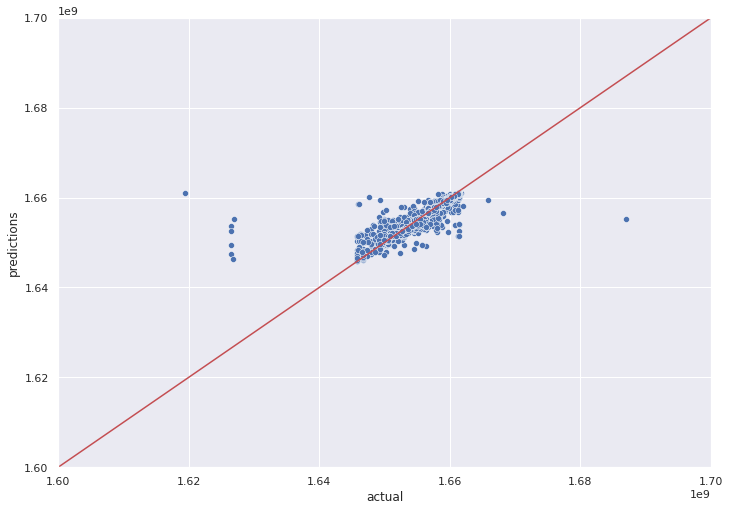

In [2443]:
xlims = (1600000000, 1700000000)
ax = sns.scatterplot(data=pred,x='actual',y='predictions')
ax.set(xscale="linear", yscale="linear", xlim=xlims, ylim=xlims)
ax.plot(xlims, xlims, color='r')
plt.show()

In [2444]:
result = mean_squared_error(y_test, predictions, squared=False)
result

3815464.0172450575

In [2445]:
np.sqrt(mean_squared_log_error(y_test, predictions))

0.0021680924749785074

In [2446]:
r2 = r2_score(y_test, predictions)
r2

0.4954484752502911

In [2447]:
importance = model.feature_importances_

df = pd.DataFrame(list(zip(importance, X.columns.to_list())),columns =['importance', 'feature'])  
# print(importance,X.columns.to_list())
# df.head()

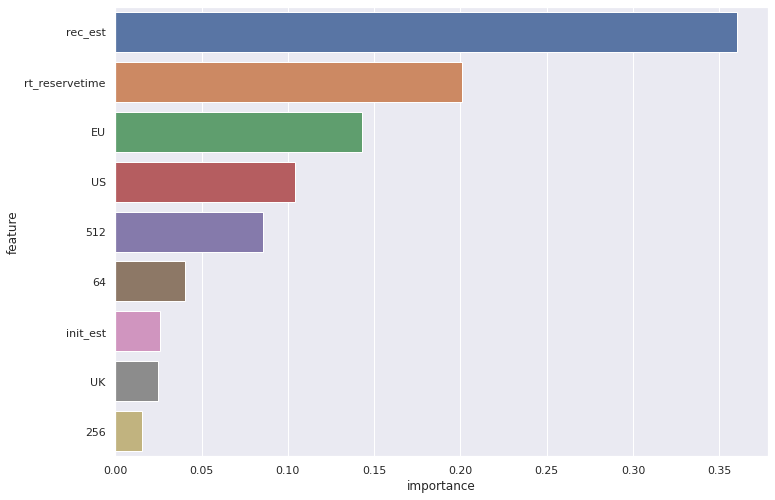

In [2448]:
df = df.sort_values(by='importance', ascending=False)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(data=df,x='importance',y='feature');

In [2449]:
no_answer

,rt_reservetime,init_est,rec_est,ready,EU,UK,US,64,256,512
1,1.635595e+09,1,1,NaN,0,1,0,0,0,1
2,1.626455e+09,0,4,NaN,0,0,1,0,0,1
3,1.626460e+09,3,3,NaN,0,0,1,0,1,0
4,1.626479e+09,3,3,NaN,1,0,0,0,1,0
5,1.627424e+09,2,1,NaN,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
21779,1.647627e+09,1,1,NaN,0,0,1,1,0,0
21780,1.650984e+09,1,1,NaN,0,0,1,0,0,1
21782,1.652380e+09,1,1,NaN,0,0,1,0,1,0
21786,1.646643e+09,1,1,NaN,0,0,1,1,0,0


In [2450]:
holdout = no_answer.drop(columns=['ready'])
holdout_predictions = model.predict(holdout)
list(pd.to_datetime(holdout_predictions, unit='s'))

[Timestamp('2022-08-19 13:41:20'),
 Timestamp('2022-03-17 03:52:32'),
 Timestamp('2022-05-08 12:48:00'),
 Timestamp('2022-05-08 09:44:32'),
 Timestamp('2022-08-06 15:42:56'),
 Timestamp('2022-08-10 01:18:56'),
 Timestamp('2022-06-11 16:32:00'),
 Timestamp('2022-04-29 20:22:24'),
 Timestamp('2022-06-17 11:52:32'),
 Timestamp('2022-03-20 15:36:32'),
 Timestamp('2022-03-16 21:34:56'),
 Timestamp('2022-04-21 10:27:12'),
 Timestamp('2022-03-23 09:53:04'),
 Timestamp('2022-03-12 17:18:56'),
 Timestamp('2022-04-29 14:43:12'),
 Timestamp('2022-03-22 15:10:56'),
 Timestamp('2022-05-30 10:46:24'),
 Timestamp('2022-05-07 05:28:32'),
 Timestamp('2022-04-10 12:45:52'),
 Timestamp('2022-03-02 23:45:04'),
 Timestamp('2022-05-19 20:35:12'),
 Timestamp('2022-05-30 09:25:20'),
 Timestamp('2022-02-27 16:19:12'),
 Timestamp('2022-05-22 05:52:00'),
 Timestamp('2022-04-08 04:11:44'),
 Timestamp('2022-03-27 00:08:32'),
 Timestamp('2022-03-15 14:02:40'),
 Timestamp('2022-05-28 19:44:00'),
 Timestamp('2022-05-